<a href="https://colab.research.google.com/github/Nongbon/INTERNSHIP_NARIT/blob/main/M_phot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns


In [4]:
!wget https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv

--2021-05-17 06:47:03--  https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22722 (22K) [text/plain]
Saving to: ‘data_phot.csv’

data_phot.csv       100%[===================>]  22.19K  --.-KB/s    in 0s      

2021-05-17 06:47:03 (62.9 MB/s) - ‘data_phot.csv’ saved [22722/22722]



In [5]:
data_phot = pd.read_csv("data_phot.csv").drop(['E(B-V)'],axis=1)
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375
...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403


In [10]:
data_phot['d_hi-d'] = data_phot.d_hi - data_phot.d_est
data_phot['d_lo-d'] = data_phot.d_lo - data_phot.d_est
data_phot['sd'] = (data_phot['d_hi-d'] + data_phot['d_lo-d']) / 2  
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,d_hi-d,d_lo-d,sd
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,0.662431,-0.651813,0.005309


In [23]:
#GENERATE
s = np.random.normal(data_phot.d_est[0] ,data_phot.sd[0], 10**4)
s

array([192.93518681, 192.93231489, 192.93711562, ..., 192.93166246,
       193.00516235, 192.93379591])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


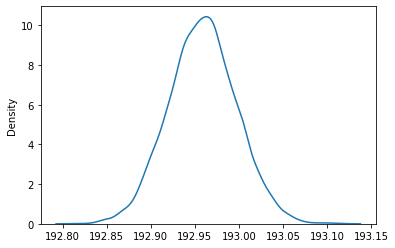

In [28]:
sns.distplot(s , hist=False)

In [ ]:
data_phot['M_r'] = data_phot.r - 5 * (np.log10(data_phot.d_est)-1) - data_phot.A_r
data_phot['M_J'] = data_phot.J - 5 * (np.log10(data_phot.d_est)-1) - data_phot.A_J
data_phot['M_K'] = data_phot.K - 5 * (np.log10(data_phot.d_est)-1) - data_phot.A_K
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,M_r,M_J,M_K
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,10.501134,7.442662,6.697207
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,13.622536,9.702715,8.923497
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,11.890469,7.838275,6.979091
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,10.834219,7.617696,6.831093
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,9.878502,6.709459,5.845520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,10.794044,7.569195,6.761970
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,11.457165,7.810009,7.136370
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,12.135105,8.764106,7.989774
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,14.254868,9.763041,8.889089


In [ ]:
data_phot.corr()

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,M_r,M_J,M_K
KIC,1.000000,0.140471,0.142569,0.137817,-0.005902,-0.005902,-0.005902,0.127325,0.141069,0.140163,-0.024861,-0.030136,-0.031051
d_est,0.140471,1.000000,0.999108,0.998913,0.665269,0.665269,0.665269,0.442960,0.592245,0.592206,-0.437018,-0.433385,-0.428921
d_lo,0.142569,0.999108,1.000000,0.996055,0.667006,0.667006,0.667006,0.441261,0.595274,0.595057,-0.448963,-0.443330,-0.439107
d_hi,0.137817,0.998913,0.996055,1.000000,0.661800,0.661800,0.661800,0.443704,0.587604,0.587776,-0.423254,-0.421753,-0.417016
A_r,-0.005902,0.665269,0.667006,0.661800,1.000000,1.000000,1.000000,0.327002,0.423634,0.419041,-0.303153,-0.298138,-0.297220
A_J,-0.005902,0.665269,0.667006,0.661800,1.000000,1.000000,1.000000,0.327002,0.423634,0.419041,-0.303153,-0.298138,-0.297220
A_K,-0.005902,0.665269,0.667006,0.661800,1.000000,1.000000,1.000000,0.327002,0.423634,0.419041,-0.303153,-0.298138,-0.297220
r,0.127325,0.442960,0.441261,0.443704,0.327002,0.327002,0.327002,1.000000,0.943647,0.937961,0.520713,0.532768,0.532125
J,0.141069,0.592245,0.595274,0.587604,0.423634,0.423634,0.423634,0.943647,1.000000,0.999096,0.267012,0.340775,0.346337
K,0.140163,0.592206,0.595057,0.587776,0.419041,0.419041,0.419041,0.937961,0.999096,1.000000,0.259918,0.337731,0.345548


In [ ]:
M = data_phot.iloc[:,10:13]
M

,M_r,M_J,M_K
0,10.501134,7.442662,6.697207
1,13.622536,9.702715,8.923497
2,11.890469,7.838275,6.979091
3,10.834219,7.617696,6.831093
4,9.878502,6.709459,5.845520
...,...,...,...
203,10.794044,7.569195,6.761970
204,11.457165,7.810009,7.136370
205,12.135105,8.764106,7.989774
206,14.254868,9.763041,8.889089


In [ ]:
M.to_csv("M_phot.csv")